In [ ]:
!git clone https://github.com/new5558/RedPajama-Data.git

In [ ]:
%cd RedPajama-Data/data_prep/cc/cc_net

/content/RedPajama-Data/data_prep/cc/cc_net


In [ ]:
!make install

In [ ]:
# !rm -rf data/cirrus/
# !rm -rf data/lm_sp/
!mkdir data
!mkdir data/cirrus

In [ ]:
!mkdir data/cirrus/txt
!mkdir data/cirrus/sp

In [ ]:
!make lang=th lm

In [ ]:
!ls -lh /content/RedPajama-Data/data_prep/cc/cc_net/data/lm_sp

In [ ]:
!pip install kenlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.0/425.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kenlm: filename=kenlm-0.1-cp310-cp310-linux_x86_64.whl size=3003872 sha256=7f20327c876d34059ca593ac3f9add71d32a6d058d0d1ded4a40cf5639b25eae
  Stored in directory: /root/.cache/pip/wheels/4e/3a/01/9105a071c30781823efbd96a58279c16f948a87cafb1144042
Successfully built kenlm


In [ ]:
!pip install transformers datasets zstandard sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
!cp /content/RedPajama-Data/data_prep/cc/cc_net/data/lm_sp/th.arpa.bin /content/drive/MyDrive/Openthaigpt/th.arpa.bin

In [ ]:
import time
import kenlm
import sentencepiece  # type: ignore
from typing import Optional
from cc_net.text_normalizer import normalize

def get_lm(lang: Optional[str]) -> Optional[kenlm.Model]:
    if lang is None:
        return None
    start_load = time.time()

    lm_config = kenlm.Config()
    lm_config.load_method = 2

    model = f'/content/RedPajama-Data/data_prep/cc/cc_net/data/lm_sp/{lang}.arpa.bin'

    lm = kenlm.Model(str(model), lm_config)
    load_time = time.time() - start_load
    print(f"Loaded (took {load_time / 60:.1f}min)")

    return lm

def pp(log_score, length):
    return 10.0 ** (-log_score / length)

sp = sentencepiece.SentencePieceProcessor()
sp.load(f'/content/RedPajama-Data/data_prep/cc/cc_net/data/lm_sp/th.sp.model') # TODO: Add model

class SentencesLM:
    """Returns the score of each individual paragraph."""
    model = get_lm('th')



    def do(self, document) -> Optional[str]:  # type: ignore

        sentences = []
        total_pp = 0
        total_length = 0
        for line in document:
            # if self.normalize:
            line = normalize(line, accent = False)
            tokenized_line = " ".join(sp.encode_as_pieces(line))
            # print(tokenized_line, 'tokenized_line')
            log_score = self.model.score(tokenized_line)
            length = len(line.split()) + 1

            total_length += length
            total_pp += log_score

            # sentences.append(f"{pp(log_score, length)}\t{line}")

        # return "\n".join(sentences)
        return round(pp(total_pp, total_length), 1)

Loaded (took 0.0min)


In [ ]:
lm = SentencesLM()

In [ ]:
print(lm.do(['ตั้งแต่ ค.ศ. 1908 เขาได้เป็นประธานกองทุนประกันแรงงาน', 'สาธารณรัฐโซเวียตฮังการี เป็นสาธารณรัฐที่มีอยู่เป็นเวลาสั้น ๆ ในภูมิภาคยุโรปตะวันออก มีอาณาเขตครอบคลุมดินแดนประมาณ 23% ของดินแดนฮังการีในอดีต']))

10384.5


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from datasets import load_dataset

# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("oscar-corpus/OSCAR-2301", "th", streaming = True)

In [ ]:
dataset_shuffle = dataset.shuffle()

In [ ]:
train_dataset = dataset_shuffle['train'].take(1000)

In [ ]:
train_dataset_list = list(train_dataset)

In [ ]:
# train_dataset_list

In [ ]:
from tqdm.auto import tqdm
import  pandas as pd
# print(lm.do(train_dataset_list[125]['text'].split('\n')))

result = []
for item in tqdm(train_dataset_list):
  score = lm.do(item['text'].split('\n'))
  result.append({'text': item['text'], 'score': score})

result_df = pd.DataFrame(result)

In [ ]:
# pretty_df = result_df.iloc[:10].to_string()
# print(pretty_df)

In [ ]:
result_df.to_csv('/content/oscar_wiki_perplexity_df.csv')

In [ ]:
import math
result_df["log_score"] = result_df["score"].apply(lambda x : math.log(x))

<Axes: >

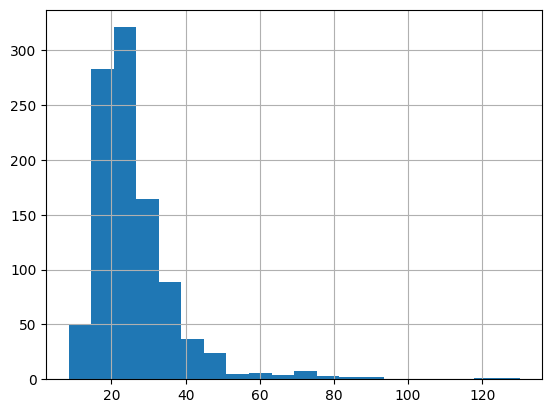

In [ ]:
result_df["log_score"].hist(bins=20)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Openthaigpt/toy_df_for_classify.csv")

In [ ]:
import math
from tqdm import tqdm
result = []
labels = []
c=0
for i,item in tqdm(enumerate(df["text"].tolist())):
  try :
    score = lm.do(item.split("\n"))
  except:
    score = 4e274
    c+=1

  result.append(score)
  if i<1972:
    labels.append(1)
  else:
    labels.append(0)

df["score"] = result
df["log_score"] = df["score"].apply(math.log)

print(c)

3972it [00:10, 384.75it/s]

3


In [ ]:
df["labels"]=labels

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df["labels"], test_size=0.2, random_state=42,stratify=df["labels"])

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2)

In [ ]:
model.fit(X_train[["log_score"]],y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.78      0.28      0.41      1600
           1       0.56      0.92      0.69      1577

    accuracy                           0.60      3177
   macro avg       0.67      0.60      0.55      3177
weighted avg       0.67      0.60      0.55      3177



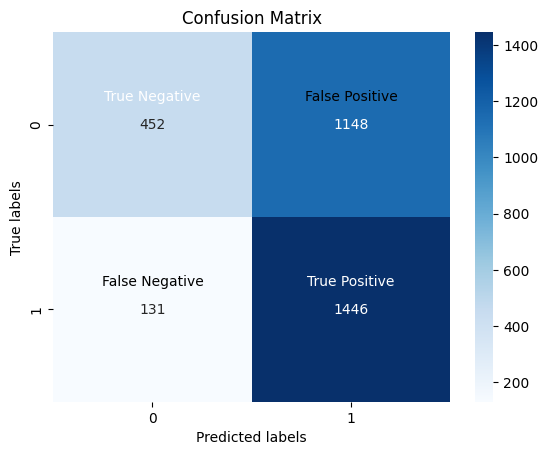

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_pred = model.predict(X_train[["log_score"]])
print(classification_report(y_train,train_pred))

def plot_confusion_matrix(labels,pred):
  cm = confusion_matrix(labels,pred)

  sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', )

  # Set axis labels
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')

  def annotate():
    annotations = ["True Negative","False Positive","False Negative","True Positive"]
    annot_idx = 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.35, annotations[annot_idx],
                    ha="center", va="center",
                    color="white" if (i+j)%2==0 else "black")
            annot_idx+=1
  annotate()
  plt.show()

plot_confusion_matrix(y_train,train_pred)



              precision    recall  f1-score   support

           0       0.74      0.19      0.31       400
           1       0.53      0.93      0.68       395

    accuracy                           0.56       795
   macro avg       0.64      0.56      0.49       795
weighted avg       0.64      0.56      0.49       795



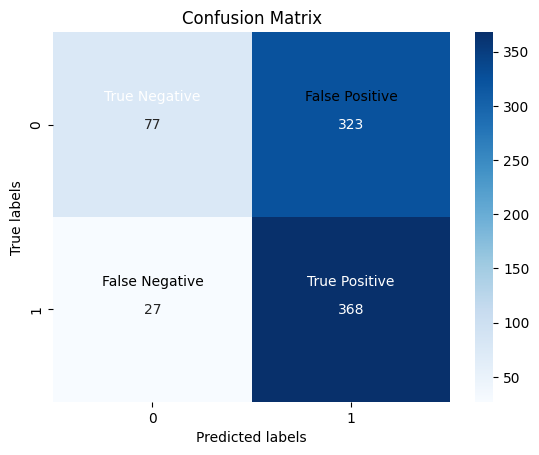

In [ ]:
test_pred = model.predict(X_test[["log_score"]])
print(classification_report(y_test,test_pred))
plot_confusion_matrix(y_test,test_pred)


In [ ]:
import pickle
filename = '/content/decision_tree.sav'
pickle.dump(model, open(filename, 'wb'))



In [ ]:
df.to_csv("/content/drive/MyDrive/Openthaigpt/tmp_dataset.csv",index=False)

In [ ]:
df[:1972]["log_score"].describe()

count    1972.000000
mean        7.805707
std         0.064806
min         7.275934
25%         7.780763
50%         7.808282
75%         7.832054
max         8.595838
Name: log_score, dtype: float64

In [ ]:
df["text"][1974]

'บ่อน้ำผุดธรรมชาติ ตั้งอยู่ในสวนกาญจนาภิเษก ตำบล หมูสี อำเภอ ปากช่อง ลักษณะของน้ำจะใสและเย็นมาก ซึ่งน้ำจะไหลอยู่ตลอดเวลา สามารถลงเล่นน้ำได้ ถ้าเป็นช่วงหน้าฝนน้ำจะเยอะกว่าปกติ ตรงที่จอดรถน้ำผุดจะมีอาหารขายอยู่ ไก่ย่าง ส้มตำ ถั่วต้ม หน้าทางเข้ามีกางเกงเล่นน้ำขาย ห้ามนำเครื่องดื่มแอลกฮอล เหล้า เบียร์เข้าไปทาน\nจากแยกผ่าน The Smoke House มุ่งหน้าไปทาง Palio, อช. เขาใหญ่ จับระยะทางประมาณ 15 กิโลเมตรจากแยกมิตรภาพ มองหาซอยทางซ้ายมือที่มีป้ายมอม่วนหลาย, น้ำพุธรรมชาติ (กม 15) ให้เลี้ยวซ้ายเข้าไปในซอย แล้ววิ่งไปทางซ้าย (ย้ำว่าซอยทางซ้ายนะครับ ถ้าไปซอยทางขวาจะเป็นซอยของ เบลล์วิลล่า รีสอร์ท & มอม่วนหลาย) ขับตรงไปประมาณ 600 เมตร จะเจอที่จอดรถน้ำผุด? จอดฟรีไม่เสียเงิน ถ้าขับรถเลยไปจนเจอ Palio แสดงว่าเลยแล้วครับ ทางเข้าน้ำผุดจะอยู่ก่อนถึง Palio ประมาณ 1 กิโลเมตร\nขับมาทางถนนธนรัชต์มุ่งหน้าไปแยกมิตรภาพ ประมาณ 7 กิโลเมตรจะเจอกับ Palio จากนั้นให้ขับช้าๆ มองทางขวามือหาซอยที่มีป้ายมอม่วนหลาย, น้ำพุธรรมชาติ (กม 15) ให้เลี้ยวขวาเข้าไปในซอย แล้ววิ่งไปทางซ้าย (ย้ำว่าซอยทางซ้ายนะครับ ถ้าไปซอยทางขวาจะเป็นซอยของ

In [ ]:
df[1972:]

,index,id,text,score,log_score
1972,22813,22813,ปฏิทินปี 2559 ปีวอก รูปลิง น่ารัก ๆ พร้อมวันหย...,2537.5,7.838935
1973,20041,20041,"รายงานตัววันนี้...เฮ!!! ทั้งไทยและเทศ ""หมูป่า""...",2442.2,7.800655
1974,26868,26868,บ่อน้ำผุดธรรมชาติ ตั้งอยู่ในสวนกาญจนาภิเษก ตำบ...,2399.7,7.783099
1975,27796,27796,ใบหุ้น - นี่คือพระมารดาของเงินลงเงินทั้งเพในขณ...,2596.9,7.862074
1976,23583,23583,"099-9624405 085-4437922,Snail white,All in one...",2512.5,7.829034
...,...,...,...,...,...
3967,13001,13001,สวัสดีครับ เพื่อนๆชาว Lords Mobile ทุกท่าน วัน...,2512.2,7.828914
3968,14284,14284,น้องทานนมผงS26สีม่วง นน.น้องตอน4เดือน6.2ถือว่า...,2214.2,7.702646
3969,24596,24596,2017-03-14 2017-03-15 followking พระมหากษัตริย...,2452.4,7.804822
3970,16302,16302,มีการประเมินว่า 80-90% ของผู้ที่มีภาวะการนอนที...,2548.5,7.843260


In [ ]:
for i,text in enumerate(result_df[result_df["log_score"]>40].sample(20)["text"].tolist()):
  print("doc")
  print(text)
  print()

doc
มีเงินใช้แบบไม่ขาดมือหาเงินพิเศษกับ สล็อตออนไลน์ ของพวกเรากันได้เลยกับเว็บที่ให้ทุกคนได้หารายได้ได้แบบง่ายๆและไม่จำต้องยุ่งยากพึ่งพิงคนใดกันแน่และไม่จำต้องเดินทางไปสถานที่จริงอีกต่อไปไม่ว่าคุณจะว่างตอนไหนคุณก็สามารถเล่นได้เลยและไม่จำต้องทุกข์บากลำบากไปอีกต่อไปเพราะเหตุว่าพวกเราเป็นเกมซึ่งสามารถรองรับทุกแพลตฟอร์มการใช้งานก็เลยทำให้ทุกคนมีความสบายที่สุดกับกันทำเงินและก็ทำกำไรที่สุดปกป้องไปอย่างยิ่งจริงๆกับเว็บสล็อตออนไลน์ที่มีจบครบในที่เดียวให้ทุกคนได้เลือกเล่นได้อย่างจุใจได้ตลอด 1 วันกันเลย เข้าเล่นได้ทุกเกม ทุกค่าย
สล็อตออนไลน์ เพราะเหตุใดเกมของพวกเราก็เลยเป็นเกมที่สุดฮอตมากมายในเวลานี้ ?
• สล็อตออนไลน์ ให้ความเชื่อมั่นแก่นักพนันเนื่องจากว่าพวกเราเป็นเว็บที่มีการเงินที่มีความโปร่งสบายใสรวมทั้งมั่นคงที่ทุกคนสามารถวางใจได้เลยรวมทั้งยังเป็นเว็บไซต์ตรงมีใบเซอร์รับประกันให้ทุกคนได้ทราบสึกเพลิดเพลินใจรวมทั้งห่วงที่สุดกับการเล่นเกมจากเว็บสล็อตออนไลน์ของพวกเรา
• ให้ทุกคนได้ทำเงินได้อย่างยิ่งสุดกับเว็บที่ให้ทุกคนได้หารายได้ได้ทุกเกมแล้วก็ลงพนันได้ทุกที่ที่ต้องการกับกระบวนการทำรายได้อย่างมาก

In [ ]:
for i,text in enumerate(result_df[result_df["log_score"]>40].sample(20)["text"].tolist()):
  print("doc")
  print(text)
  print()

doc
ข่าวเว็ปไซต์ todayszaman.com – ในปีการศึกษา 2554-2555 นี้ มหาวิทยาลัยหลายแห่งในตุรกียังคงมีการห้ามนักศึกษาหญิงคลุมฮิญาบ ถึงแม้คณะกรรมการการอุดมศึกษา Higher Education Board (YOK) จะยกเลิกกฎระเบียบนี้แล้วก็ตาม
ถึงแม้สถาบันส่วนมาจะแสดงการยอมรับกฎใหม่ที่ประกาศเมื่อปี 2553 และนักศึกษาสามารถคลุมฮิญาบเข้ามาเรียนได้ แต่กฏระเบียบในคู่มือการรับนักศึกษาภาคฤดูร้อนของศูนย์ Student Selection and Placment (OSYM) ยังคงระบุให้นักศึกษาต้องถอดฮิญาบ เมื่อมาลงทะเบียน เป็นเหตุให้นักศึกษาในมหาวิทยาลัยออกมาประท้วงในเรื่องนี้
ปัจจุบันบางมหาวิทยาลัยในกรุงแองการ่า อาทิ มหาวิทยาลัยเทคนิคตะวันออกกลาง ม.แองการ่า (ODTU) ม.Hacettepe ม.กาซี, ม.แองการ่า, ม.Baskent and Atilim ยังให้สิทธิ์อาจารย์ผู้สอนเป็นผู้พิจารณาว่า จะอนุญาตให้นักศึกษาที่แต่งกายแบบฮิญาบเข้าห้องเรียนได้หรือไม่ โดยนักศึกษาที่คลุมฮิญาบสามารถเข้าในบริเวณมหาวิทยาลัยได้ แต่อาจไม่ได้รับอนุญาตให้เข้าในบางคณะ หรือในห้องเรียนบางวิชา
ประธานคณะกรรมการการอุดมศึกษา ออกแถลงการณ์เมื่อเดือนมีนาคม พ.ศ. 2553 เตือนมหาวิทยาลัยที่ยังคงมีพฤติกรรมห้ามนักศึกษาคลุมฮิญาบเข้

<Axes: >

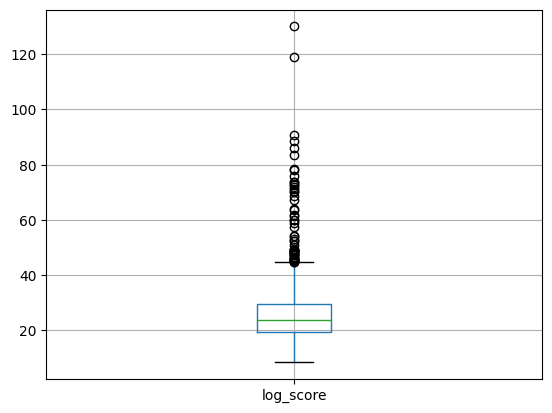

In [ ]:

result_df.boxplot(column=["log_score"])

In [ ]:
result_df.sort_values('score').iloc[-20:]

,text,score
19,สร้างรายได้จากการเล่นสล็อต เล่นเกมส์สล็อตslotx...,6.994830e+24
963,ผู้เล่นทุกคนที่ต้องการเพิ่มประสบการณ์การเล่นที...,1.363968e+25
918,ร่างกายต้องการอินซูลินเพื่อควบคุมระดับน้ำตาลใน...,2.941681e+25
741,การเข้าสู่ระบบโซเชียลนั้นไม่สามารถกระทำได้โดยไ...,1.934509e+26
211,ภาพดอกไม้สวยๆเห็นแล้วสบายใจมีความสุข ตอนถ่ายได...,4.617546e+26
430,แทงบอล ผลบอลสด UFABET มีมากมายกีฬาให้พวกเราได้...,5.519635e+26
709,ไฮโลเงินจริง สำหรับนักพนันที่กำลังมองหาเว็บพนั...,1.200325e+28
131,บาคาร่าออนไลน์ ได้เงินจริง mgm99sa บาคาร่า การ...,1.526711e+28
263,สล็อตเพนกวิน เกมส์สล็อตเพนกวิ้น เป็นเกมส์สล็อต...,1.428869e+29
465,สมัครบาคาร่า888 สมัครสมาชิกใหม่วันนี้กับเว็บพน...,1.709577e+30


In [ ]:
result_df.sort_values('score').iloc[:20]

,text,score
909,โดเมนระดับบนสุด (อังกฤษ: Top-level domain - TL...,1988.4
535,All Quiet on the Western Front แนวรบด้านตะวันต...,4691.8
360,ไทย สวิตเซอร์แลนด์ เกาหลี ลาว พม่า สหรัฐอเมริก...,4973.0
547,ไทย สวิตเซอร์แลนด์ เกาหลี ลาว พม่า สหรัฐอเมริก...,4973.0
435,รหัสไอเทม: ... ชื่อ: ... ประเภท: ทุกส่วน ฟื้นฟ...,14182.8
958,Sort by: issue date submit date title In order...,87993.2
212,﻿ ประกาศผู้ชนะการคัดเลือก (รายไตรมาส) 3/ 2563 ...,110606.3
318,เรียงลำดับ: เริ่มต้น ชื่อ (A - Z) ชื่อ (Z - A)...,116061.5
824,ครีบหลัง : โค้งเว้า ปลายครีบเรียวแหลม ปาก : จุ...,151906.3
375,ตารางเรียนนิติศาสตรบัณฑิต (ภาคพิเศษ) ภาคเรียนท...,175666.8


In [ ]:
import pandas as pd
result_df=pd.read_csv("/content/drive/MyDrive/openthaigpt/oscar_wiki_perplexity_df.csv")

FileNotFoundError: ignored